# **Stable Diffusion**

In [6]:
!pip install --upgrade diffusers[torch]

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [7]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

def generate_image(prompt):
    image = pipe(prompt).images[0]
    return image

c:\Users\Sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]c:\Users\Sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:12<00:00,  1.81s/it]


In [8]:
import base64
from io import BytesIO
from PIL import Image

def convert_image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue())
    # img_base64 = bytes("data:image/jpeg;base64,", encoding='utf-8') + img_str
    # img_base64 = img_base64.decode("utf-8")
    img_base64 = img_str.decode("utf-8")
    return img_base64

def convert_base64_to_image(img_base64):
    img_bytes = base64.b64decode(img_base64)
    img = Image.open(BytesIO(img_bytes))
    return img

In [9]:
prompt = "a photo of a cat"
image = generate_image(prompt)
image_base64 = convert_image_to_base64(image)
image_base64

c:\Users\Sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
100%|██████████| 50/50 [00:08<00:00,  5.90it/s]


'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAIAAgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDgQKcBSgU4CkaCbacBTgKUCi4CAU4ClApwFAWG4pdtPApcUDG7aXFOxS4oEM20u2nYpcUAM20oWnhacFoAaFp4WlC08LSAQLUgWlAqRVoAaFp4WnBakC0DGBKeEqQJUgWgCMJTwlShKeqUCIwlOCVKEp4SgCHZShKnCUoSgRD

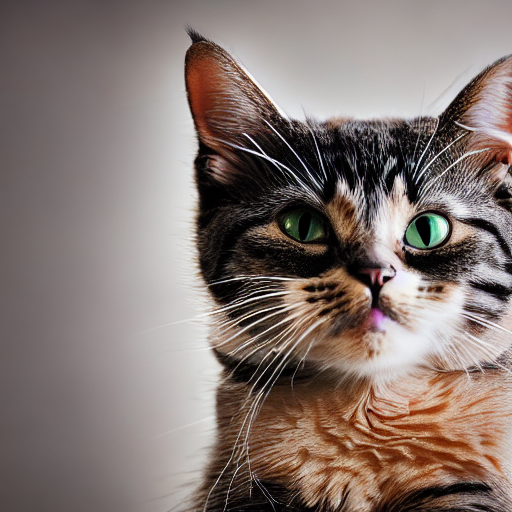

In [10]:
image


# **Transformer**

In [14]:
!pip install tf-keras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 13.3 MB/s eta 0:00:00


In [15]:
from transformers import pipeline

captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

def generate_caption(image):
    captions = captioner(image)
    generated_caption = captions[0]['generated_text']
    return generated_caption

c:\Users\Sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [12]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [16]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def get_similarity_score(prompt, generated_caption):
    embeddings1 = model.encode(prompt, convert_to_tensor=True)
    embeddings2 = model.encode(generated_caption, convert_to_tensor=True)

    similarity = util.pytorch_cos_sim(embeddings1, embeddings2).item()
    return similarity

**CNNIQA MOdel Set Up**

In [1]:
# !git clone https://github.com/lidq92/CNNIQA.git

Cloning into 'CNNIQA'...


In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
# !pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [22]:
# !python main.py

^C


**The CNNIQA TEST Function**


In [13]:
# import torch
# import torchvision.transforms as transforms
# from PIL import Image
# def evaluate_single_image(model, image_path, device):
#     """
#     Evaluate the model on a single image and return the predicted quality score.

#     Parameters:
#     - model: The trained CNNIQA model.
#     - image_path: Path to the input image.
#     - device: The device to run the evaluation on (CPU or GPU).

#     Returns:
#     - predicted_quality: The predicted quality score for the input image.
#     """
#     # Preprocess the image
#     image = Image.open(image_path).convert('RGB')
#     preprocess = transforms.Compose([
#         transforms.Resize((256, 256)),  # Resize to the input size of the model
#         transforms.ToTensor(),  # Convert to tensor
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
#     ])
#     image_tensor = preprocess(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

#     # Evaluate the model
#     with torch.no_grad():
#         output = model(image_tensor)
#         predicted_quality = torch.mean(output).item()

#     return predicted_quality

# # Example usage
# if __name__ == "__main__":
#     # Assume `model` is the trained CNNIQA model
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.load_state_dict(torch.load(trained_model_file, map_location=device))  # Load the best model

#     # Evaluate on a single image
#     image_path = '/content/drive/MyDrive/databaserelease2/Dataset/Test/Real/20.jpg'
#     predicted_quality = evaluate_single_image(model, image_path, device)
#     print(f'Predicted Quality Score: {predicted_quality}')

In [17]:
import threading

def run_with_tmole(app):
    def run_flask(app):
        app.run()
    t = threading.Thread(target=run_flask, args=(app,))
    t.start()
    !tmole 5000
    t.join()

In [23]:
from flask import Flask, request
import threading

app = Flask(__name__)

@app.route('/generate_image')
def generate_image_endpoint():
    prompt = request.args.get('prompt')
    image = generate_image(prompt)
    image_base64 = convert_image_to_base64(image)
    generated_caption = generate_caption(image_base64)
    similarity_score = get_similarity_score(prompt, generated_caption)
    return {
        'image_base64': image_base64,
        'generated_caption': generated_caption,
        'similarity_score': similarity_score
    }

if __name__ == '__main__':
    # run_with_tmole(app)
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
100%|██████████| 50/50 [00:10<00:00,  4.59it/s]
127.0.0.1 - - [11/Sep/2024 12:47:25] "GET /generate_image?prompt=cat HTTP/1.1" 200 -


In [2]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [1]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 4050 Laptop GPU
